<a href="https://colab.research.google.com/github/ludawg44/jigsawlabs/blob/master/14Apr20_SKLearn%20Simple%20Linear%20Regression%20Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SKlearn Simple Linear Regression Lab

### Introduction

In this lesson, we'll NYC high school data to help predict the graduation rate of NYC schools.  In doing this, we'll look at a single feature, the economic need index of high schools.

### Loading the Data

Let's start by loading our data.

In [0]:
import pandas as pd
grad_rate_df = pd.read_csv('https://raw.githubusercontent.com/jigsawlabs-student/regression-fundamentals/master/12-using-ml-library-lab/econ_need_grad_rate.csv')

In [0]:
grad_rate_df.shape

(415, 2)

For sklearn to be able to fit our data, each column must numeric.  Let's look at the datatypes of the columns in our `grad_rate_df`.

In [0]:
grad_rate_df.dtypes

Economic Need Index    float64
graduation_rate        float64
dtype: object

In [0]:
# show datatypes here

# Economic Need Index    float64
# graduation_rate        float64
# dtype: object

Ok, so it looks like our data is already numeric.  Next, we also need to make sure that none of our data is labeled as not a number as sklearn also does not know how to handle this data.

Count the amount of nan values across our columns.

In [0]:
grad_rate_df.isna().sum()

# display amount of na values here

# Economic Need Index     0
# graduation_rate        13
# dtype: int64

Economic Need Index     0
graduation_rate        13
dtype: int64

Ok, so because our missing data is with our target, graduation rate, we can just remove these rows.  Remove the rows that have graduate rate listed as `nan`, and assign the resulting dataframe to `grad_rate_selected_df`.

In [0]:
grad_rate_selected_df = grad_rate_df.dropna()

In [0]:
grad_rate_selected_df.shape
# (402, 2)

(402, 2)

### Fitting our Model

Ok, now it's time to fit a machine learning model.  Let's begin by separating our the features, `Economic Need Index`, and assign it to X.  And the graduation rate which we can assign to `y`.

> The X feature must be a sliced column.  Check that your X value matches the answer below. 

In [0]:
X = grad_rate_selected_df['Economic Need Index']

In [0]:
X[:3]
# 	Economic Need Index
# 0	0.730
# 1	0.903
# 2	0.58

0    0.730
1    0.903
2    0.581
Name: Economic Need Index, dtype: float64

Make sure that the shape is correct.

In [0]:
X.to_numpy()
X[:3]

0    0.730
1    0.903
2    0.581
Name: Economic Need Index, dtype: float64

In [0]:
X = X.to_numpy().reshape(-1,1)
X[:3]

array([[0.73 ],
       [0.903],
       [0.581]])

In [0]:
X.shape
# (402, 1)

(402, 1)

The y data is just a vector (or list) of target values.

In [0]:
y = grad_rate_selected_df.graduation_rate

In [0]:
y[:3]
# 0    0.74
# 1    0.63
# 2    0.96

0    0.74
1    0.63
2    0.96
Name: graduation_rate, dtype: float64

In [0]:
y.shape
# (402,)

(402,)

If your data is in the correct format, it's time to use sklearn.  Begin by loading the LinearRegression model from the library.

In [0]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [0]:
grad_rate_selected_df.columns

Index(['Economic Need Index', 'graduation_rate'], dtype='object')

In [0]:
econ = grad_rate_selected_df['Economic Need Index']
grad = grad_rate_selected_df['graduation_rate']

In [0]:
results = smf.ols('grad ~ econ', data=grad_rate_selected_df).fit()

In [0]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   grad   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     236.0
Date:                Wed, 15 Apr 2020   Prob (F-statistic):           3.47e-42
Time:                        01:09:10   Log-Likelihood:                 325.04
No. Observations:                 402   AIC:                            -646.1
Df Residuals:                     400   BIC:                            -638.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1169      0.022     51.049      0.0

In [0]:
from sklearn.linear_model import LinearRegression

Then create an instance of the linear regression model and assign it to the variable `model`.

In [0]:
model = LinearRegression()
model
# LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now call fit, passing through the feature and target data.

In [0]:
model.fit(X,y)
# LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now take a look at the coefficient and intercept associated with the model.

In [0]:
model.coef_

# array([-0.49152145])

array([-0.49152145])

In [0]:
model.intercept_
# 1.1168913738375528

1.1168913738375528

Next make use the model to predictions for our feature data.

In [0]:
predictions = model.predict(X)
predictions[:10]
# array([0.75808071, 0.6730475 , 0.83131741, 0.75660615, 0.96697733,
#        0.79592786, 0.74136898, 0.97336711, 0.76299593, 0.70942009])


array([0.75808071, 0.6730475 , 0.83131741, 0.75660615, 0.96697733,
       0.79592786, 0.74136898, 0.97336711, 0.76299593, 0.70942009])

These are the predicted graduation rates.

We'll plot these predictions in plotly, then you can plot them in matplotlib below.

In [0]:
import pandas as pd
X = pd.DataFrame(X)

In [0]:
import pandas as pd
import plotly.graph_objects as go
predictions_trace = go.Scatter(x = X.iloc[:, 0], y = predictions, name = 'expected')
observed_trace = go.Scatter(x = X.iloc[:, 0], y = y, mode = 'markers', name = 'observed')
layout = {'title': 'Graduation Rate & Economic Need', 'xaxis': {'title': 'economic need index'}, 'yaxis': {'title': 'graduation rate'}}
go.Figure(data = [observed_trace, predictions_trace], layout = layout)

Plot in matplotlib below.

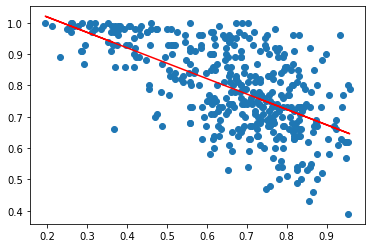

In [0]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(X,y)
ax.plot(X,predictions, 'r-')
plt.show()

Answer: <img src="https://github.com/jigsawlabs-student/regression-fundamentals/blob/master/12-using-ml-library-lab/grad-rate-econ-need.png?raw=1" width="60%">

We can get a sense of how well our model is predicting our data with the `score` method, which returns $r^2$, whatever that is.

In [0]:
model.score(X, y)

0.37103269710922127

Essentially, a returning a 1 signifies a that our model perfectly explains of the data, and a score of a 0 signifies that our model does no better at predicting our data than the mean.

### Resources
* [17 School Quality Report](https://data.cityofnewyork.us/Education/2017-School-Quality-Report/cxrn-zyvb)
* [16-17 Quality Report](https://data.cityofnewyork.us/Education/2016-2017-School-Quality-Report-Results-for-High-S/ewhs-k7um)

[HS directory](https://data.cityofnewyork.us/Education/2019-DOE-High-School-Directory/uq7m-95z8)